## Table of Content

1. [Executive Summary](#cell_executivesummary)


2. [Data Exploration](#cell_exploration)


3. [Sentiment Analysis](#cell_sentiment)


4. [Topic Modeling](#cell_TopicModeling)


5. [Practical Implication](#cell_PracticalImplication)


<a id = "cell_executivesummary"></a>
### 1. Executive Summary

The analysis done for the reviews of three theme parks of California, Paris and Hong Kong revealed insights into visitor paterns and customer satisfaction. The analysis concluded that all theme parks attract visitors from surrounding regions. Local visitors account for 63% of california's visitors and UK visitors account for 58% of Paris visitors. HongKong also attracts visitors from regional areas. The peak times for local visitors at California are the summer months of july, june and also october. The international visitors mostly visit california branch in August, October, september which would likley be cold in their come country. The branch with the most positive reviews is California followed by Hong Kong and Paris. However, Paris receieved the most positive reviews for their services. The interests by visitors are that they are visiting with their families which would mostly have small children. The california visitors visit yearly and visit to see magical attractions and enjoy themes such as space, adventure and pirate. HongKong park has attraction that children enjoy and fireworks were also mentioned. They are concerned with ques and water issues. Reviewers for Paris mentioned children, characters, magic and staff which would likley be about their positive service aspect. The concerns for all visitors were long ques, waiting times, water issues and attractions being closed. The visitors from US are especially interested in visiting with fammilies and the california branch. The uk visitors are interested about the paris branch but are faced with concerns in ques, waiting times and expensive hotels. It is recommended that management make efforts to reduce waiting time by implementing self checkouts. Also installing more water stations is recommended.Further, offering hotel deals for paris visitors is highly recommended.

Loading necessary libraries

In [ ]:
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk import PorterStemmer
from nltk.stem import PorterStemmer
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from statistics import mean
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


<a id = "cell_exploration"></a>
### 2. Data Exploration



Loading the dataset and exploration

In [ ]:
rev = pd.read_csv('ThemeParkReviews.csv')

In [ ]:
rev.head(10)

Review_ID Year_Month Reviewer_Location  \
0  148524565    2012-12     United States   
1  346403028     2015-3     United States   
2  284580024     2015-6     United States   
3  410306562    2015-12            Canada   
4  358484811     2015-7     United States   
5  298031178     2015-8    United Kingdom   
6  150795761     2013-1     United States   
7  143214528    2012-10     United States   
8  356231044     2016-3     United States   
9  314497757     2015-9     United States   

                                         Review_Text      Branch  
0  Loved seeing the Christmas lights at the park,...  California  
1  I'm not sure reviewing Disneyland even has a p...  California  
2  Went to Disneyland for one day. We arrive at o...  California  
3  I travelled to Disneyland from Toronto in Dece...  California  
4  This place might be ok for families with kids....  California  
5  I love that Disneyland continues to evolve, an...  California  
6  My teenage granddaughters has a good time but ...  California  
7  It is Disneyland . . the happiest place on ear...  California  
8  Let me start off by saying I was in Cali with ...  California  
9  Although we are pass holders, Disneyland isn't...  California

In [ ]:
#Filtering out missing reviews
rev = rev[~rev['Review_Text'].isnull()]

In [ ]:
#Function to clean text data
def preprocess(reviewtxt):
    reviewtxt = reviewtxt.str.replace("(<br/>)", "")
    reviewtxt = reviewtxt.str.replace('(<a).*(>).*(</a>)', '')
    reviewtxt = reviewtxt.str.replace('(&amp)', '')
    reviewtxt = reviewtxt.str.replace('(&gt)', '')
    reviewtxt = reviewtxt.str.replace('(&lt)', '')
    reviewtxt = reviewtxt.str.replace('(\xa0)', ' ')
    return reviewtxt

rev['Review_Text'] = preprocess(rev['Review_Text']) #Clean text

#Create new feature for the length of the review.
rev['review_len'] = rev['Review_Text'].astype(str).apply(len)
#Create new feature for the word count of the review.
rev['word_count'] = rev['Review_Text'].apply(lambda x: len(str(x).split()))

# Get year and month from year_month
rev[['year', 'month']] = rev['Year_Month'].str.split('-', expand=True)

In [ ]:
#getting number of unique values in each columns
rev.nunique()

Review_ID            34982
Year_Month             111
Reviewer_Location      155
Review_Text          34981
Branch                   3
review_len            3263
word_count             981
year                    11
month                   12
dtype: int64

Checking for unique values in each column

In [ ]:
pd.set_option('display.max_rows', None)
#print(rev['Reviewer_Location'].value_counts())

Year month unique values

In [ ]:
pd.set_option('display.max_rows', None)
#print(rev['Year_Month'].value_counts())

In [ ]:
#getting number of unique values in each columns
rev.nunique()

Review_ID            34982
Year_Month             111
Reviewer_Location      155
Review_Text          34981
Branch                   3
review_len            3263
word_count             981
year                    11
month                   12
dtype: int64

There are 2187 values where year-month is missing. need to remove these entries.

Handling of 'missing' in year-month column

In [ ]:
rev= rev[rev['Year_Month'] != 'missing']
pd.set_option('display.max_rows', None)
#print(rev['Year_Month'].value_counts())

In [ ]:
#Exploring dataframe after changes
#rev.head(10)

In [ ]:
print(rev['Year_Month'].dtype)

object


In [ ]:
#rev.sample(10)

In [ ]:
#rev.tail(10)

In [ ]:
#Number of rows and colums of dataframe
print(rev.shape)

(32813, 9)


In [ ]:
#Data types
rev.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32813 entries, 0 to 34999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          32813 non-null  int64 
 1   Year_Month         32813 non-null  object
 2   Reviewer_Location  32813 non-null  object
 3   Review_Text        32813 non-null  object
 4   Branch             32813 non-null  object
 5   review_len         32813 non-null  int64 
 6   word_count         32813 non-null  int64 
 7   year               32813 non-null  object
 8   month              32813 non-null  object
dtypes: int64(3), object(6)
memory usage: 2.5+ MB


In [ ]:
rev.describe()

Review_ID    review_len    word_count
count  3.281300e+04  32813.000000  32813.000000
mean   3.320431e+08    675.391278    125.737238
std    1.608412e+08    795.988360    148.151750
min    9.161911e+07     18.000000      3.000000
25%    1.857731e+08    237.000000     44.000000
50%    3.072011e+08    428.000000     80.000000
75%    4.609316e+08    814.000000    152.000000
max    6.708014e+08  18456.000000   3527.000000

Univariate analysis

Branch

In [ ]:
# Get the value counts by branch
branch_count = rev['Branch'].value_counts()
print("Reviews for each Branch:",branch_count)

Reviews for each Branch: Branch
California    14955
Paris         10362
HongKong       7496
Name: count, dtype: int64


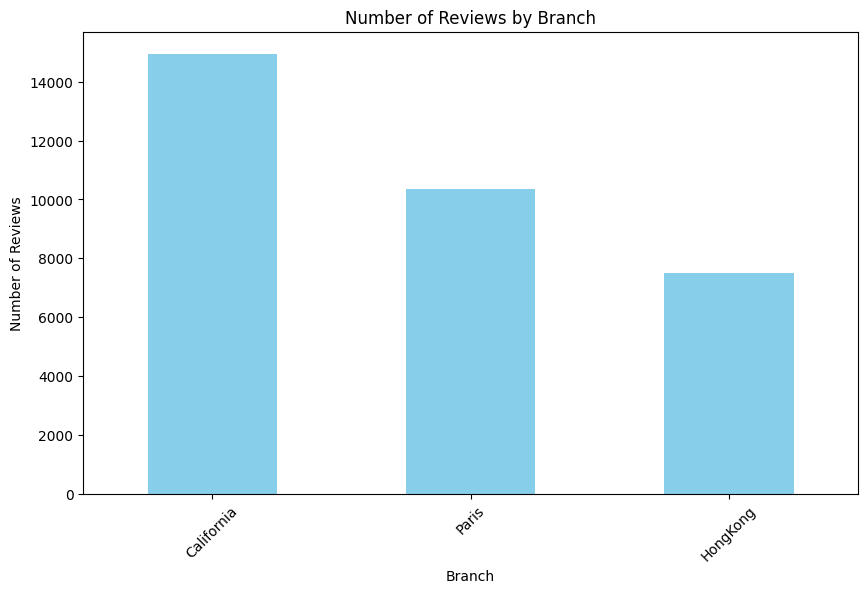

In [ ]:
# Branch counts bar chart
plt.figure(figsize=(10, 6))
branch_count.plot(kind='bar', color='skyblue')

# Add titles and labels
plt.title('Number of Reviews by Branch')
plt.xlabel('Branch')
plt.ylabel('Number of Reviews')

# Display the plot
plt.xticks(rotation = 45)  # Rotate x labels for better readability if needed
plt.show()

California branch has the highest number of reviews (14955) followed by Paris (10362) and Hongkong (7496).

Reviewer Location

In [ ]:
#checking Location for unique values.
location_count = rev['Reviewer_Location'].value_counts().head(20)
#print("Reviews for each Location:",location_count)

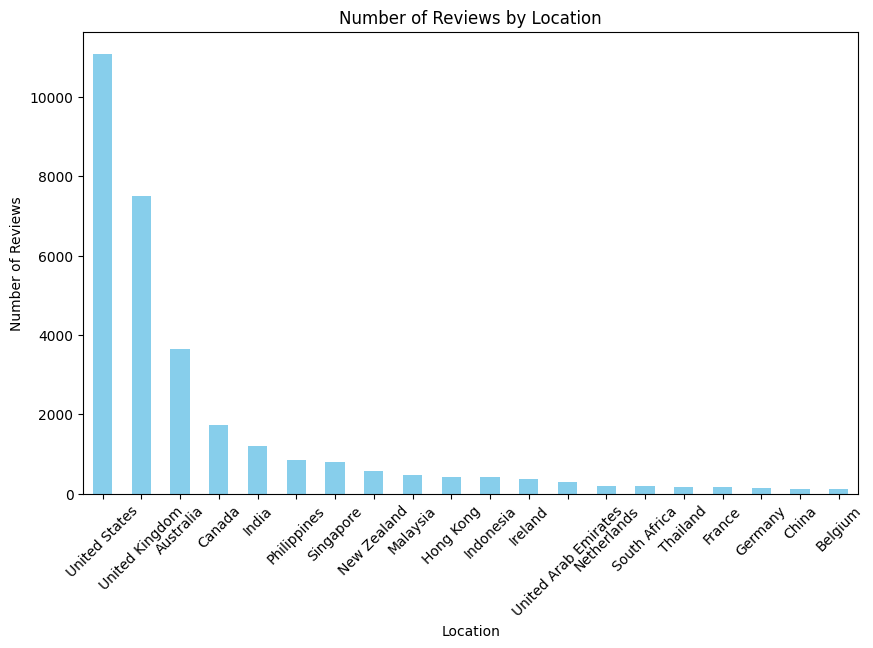

In [ ]:
# Reviewer location counts bar chart
plt.figure(figsize=(10, 6))
location_count.plot(kind='bar', color='skyblue')

# Add titles and labels
plt.title('Number of Reviews by Location')
plt.xlabel('Location')
plt.ylabel('Number of Reviews')

# Display the plot
plt.xticks(rotation = 45)  # Rotate x labels for better readability if needed
plt.show()

Visitors from USA have posted the most number of reviews followed by UK, AUstralia, Canda and India.

Year

In [ ]:
#Reviews by Year
year_count = rev['year'].value_counts()
#print("Reviews by each year:",year_count)

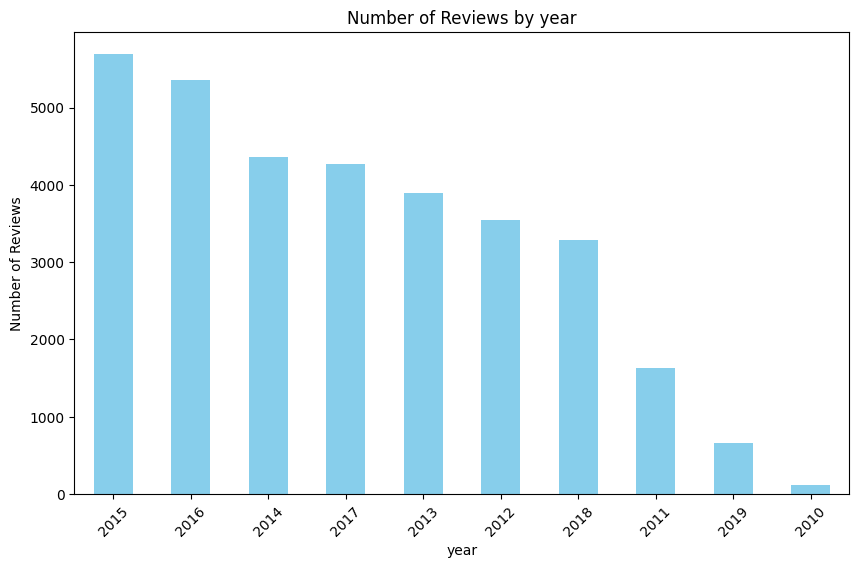

In [ ]:
# Reviewer year counts bar chart
plt.figure(figsize=(10, 6))
year_count.plot(kind='bar', color='skyblue')

# Add titles and labels
plt.title('Number of Reviews by year')
plt.xlabel('year')
plt.ylabel('Number of Reviews')

# Display the plot
plt.xticks(rotation = 45)  # Rotate x labels for better readability if needed
plt.show()

Most reviews were posted in 2015 followed by 2016 and 2017...

Month

In [ ]:
print(rev['month'].dtype)

object


Renaming month by name instead of number

In [ ]:
# Replace 'number' with 'month name' in the 'month' column
rev['month'] = rev['month'].replace('1', 'January')
rev['month'] = rev['month'].replace('2', 'February')
rev['month'] = rev['month'].replace('3', 'March')
rev['month'] = rev['month'].replace('4', 'April')
rev['month'] = rev['month'].replace('5', 'May')
rev['month'] = rev['month'].replace('6', 'June')
rev['month'] = rev['month'].replace('7', 'July')
rev['month'] = rev['month'].replace('8', 'August')
rev['month'] = rev['month'].replace('9', 'September')
rev['month'] = rev['month'].replace('10', 'October')
rev['month'] = rev['month'].replace('11', 'November')
rev['month'] = rev['month'].replace('12', 'December')

In [ ]:
#rev.head(10)

In [ ]:
#Reviews by month
month_count = rev['month'].value_counts()
#print("Reviews by each Month:",month_count)

In [ ]:
# Verify the replacement
#print("Reviews by each Month:",month_count)

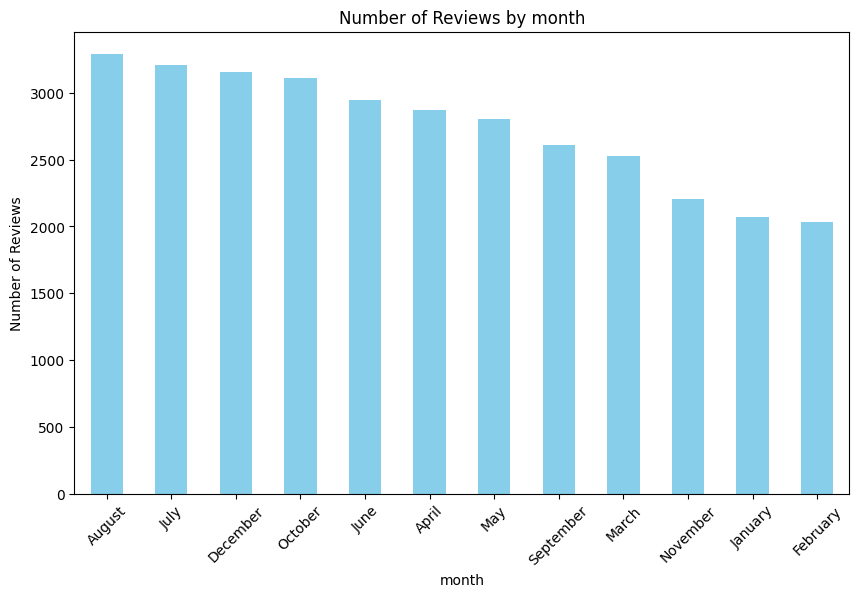

In [ ]:
# Reviewer month counts bar chart
plt.figure(figsize=(10, 6))
month_count.plot(kind='bar', color='skyblue')

# Add titles and labels
plt.title('Number of Reviews by month')
plt.xlabel('month')
plt.ylabel('Number of Reviews')

# Display the plot
plt.xticks(rotation = 45)  # Rotate x labels for better readability if needed
plt.show()

Most Reviews were posted in August,July,September and October. Assuming that visiting is high during these months. Februaary and january has the least number of reviews.

In [ ]:
#Part A

Univariate analysis

In [ ]:
Top_Location_by_Branch = rev.groupby(['Branch'])['Reviewer_Location'].value_counts()
#print(Top_Location_by_Branch)

In [ ]:
#Converting Top Location by Branch to a dataframe
Top_Location_by_Branch = Top_Location_by_Branch.reset_index(name ='Visitor_Count')
#Top_Location_by_Branch.head(10)

#Part A

In [ ]:
#Getting top 10 countries for california
california_data = Top_Location_by_Branch[Top_Location_by_Branch['Branch'] == 'California']
top_10_california = california_data.sort_values(by='Visitor_Count', ascending=False).head(10)
#Getting top 10 countries for Paris
paris_data = Top_Location_by_Branch[Top_Location_by_Branch['Branch'] == 'Paris']
top_10_paris = paris_data.sort_values(by='Visitor_Count', ascending=False).head(10)
#Getting top 10 countries for HongKong
hongkong_data = Top_Location_by_Branch[Top_Location_by_Branch['Branch'] == 'HongKong']
top_10_hongkong = hongkong_data.sort_values(by='Visitor_Count', ascending=False).head(10)

print("Top 10 Visitor Data for Califoria Branch:")
print(top_10_california)
print("Top 10 Visitor Data for Paris Branch")
print(top_10_paris)
print("Top 10 Visitor Data for HongKong Branch:")
print(top_10_hongkong)

Top 10 Visitor Data for Califoria Branch:
       Branch Reviewer_Location  Visitor_Count
0  California     United States           9431
1  California         Australia           1910
2  California            Canada           1431
3  California    United Kingdom            807
4  California       New Zealand            404
5  California             India            110
6  California            Mexico             82
7  California         Singapore             72
8  California            Brazil             44
9  California       Philippines             43
Top 10 Visitor Data for Paris Branch
    Branch Reviewer_Location  Visitor_Count
214  Paris    United Kingdom           6113
215  Paris     United States            974
216  Paris         Australia            451
217  Paris           Ireland            321
218  Paris             India            239
219  Paris       Netherlands            139
220  Paris            Canada            139
221  Paris            France            133
222  Par

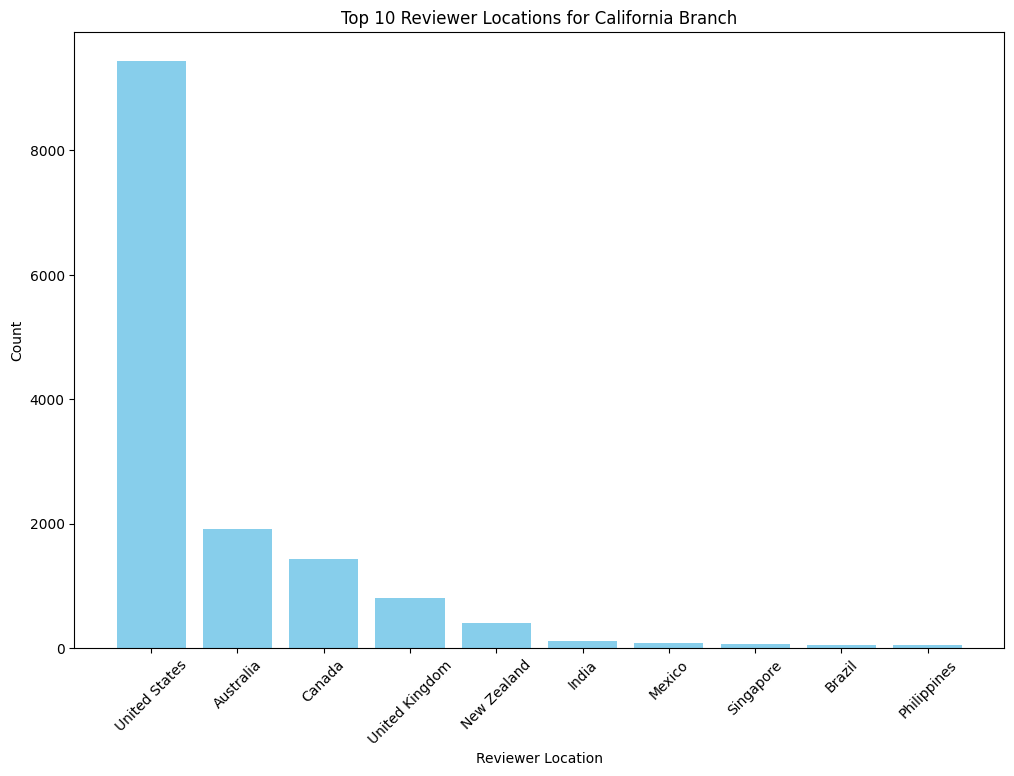

In [ ]:
#Visualising California visitor locations

plt.figure(figsize=(12, 8))
plt.bar(top_10_california['Reviewer_Location'], top_10_california['Visitor_Count'], color='skyblue')
plt.title('Top 10 Reviewer Locations for California Branch')
plt.xlabel('Reviewer Location')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Display the plot
plt.show()

The top 10 visitors for California Branch are from the countries USA, Australia, Canada, UK, New Zealand, India, Mexico, Singapore, Brazil and Philipines.

It is important to note that 63% of total visitors for california are from USA. The next highest visitors are from ensglish speaking countries such as AU,Canada,UK and NZ. Further, there are visitors from neighbouring countries such as Mexico and Brazil in the top 10.

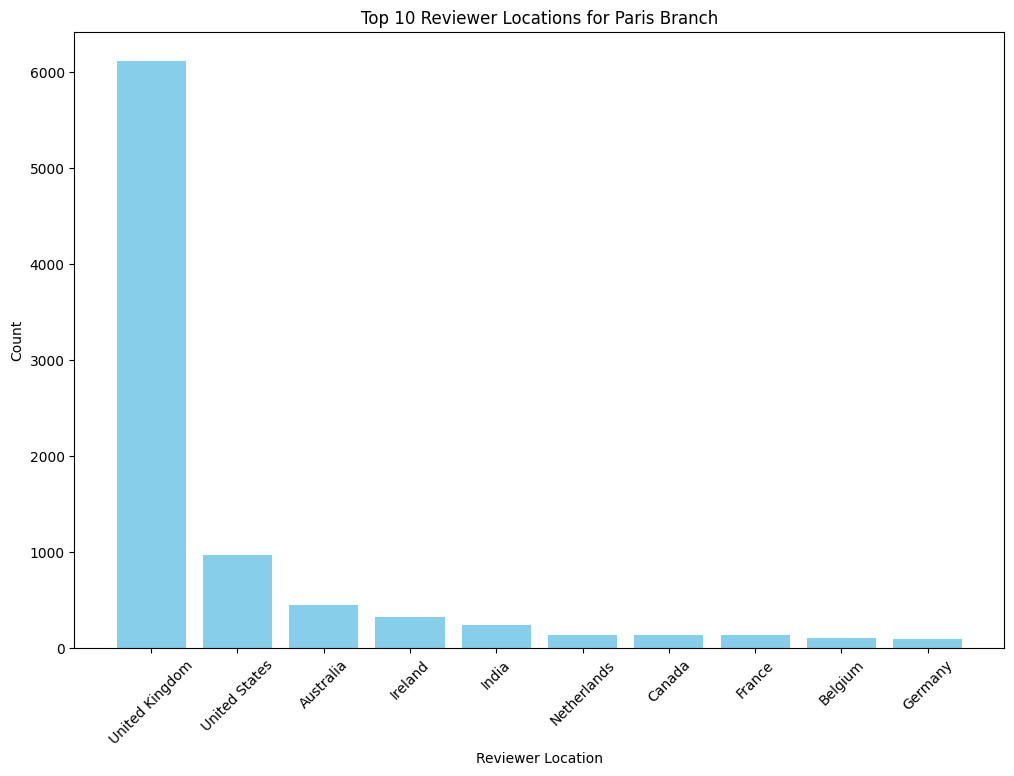

In [ ]:
#Visualising Paris visitor locations

plt.figure(figsize=(12, 8))
plt.bar(top_10_paris['Reviewer_Location'], top_10_paris['Visitor_Count'], color='skyblue')
plt.title('Top 10 Reviewer Locations for Paris Branch')
plt.xlabel('Reviewer Location')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Display the plot
plt.show()

The top 10 visitors for Paris Branch are from the countries UK,USA,Australia,Ireland,India, Netherlands,Canada,France, Belgium and Germany.

It is interesting to note that 58% of visitors are for Paris branch are from UK which is a neigbouring country. Only 1% of visitors are from France which is contrasting to visitors in California.  

The other countries in the top 10 are also neigbouring european countries such as Germany, Ireland, Netherlands and Belgium. English speaking countries such as US and Australia are also seen here. Further, Visitors from india are also common among California and Paris.

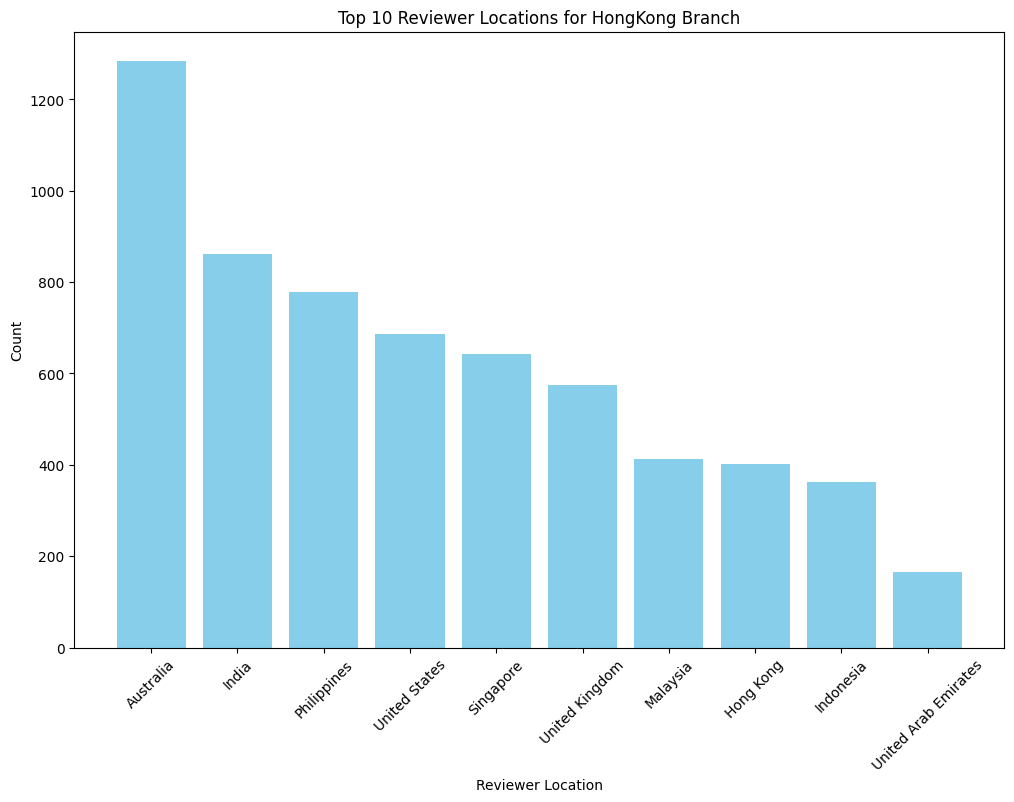

In [ ]:
#Visualising HongKong visitor locations

plt.figure(figsize=(12, 8))
plt.bar(top_10_hongkong['Reviewer_Location'], top_10_hongkong['Visitor_Count'], color='skyblue')
plt.title('Top 10 Reviewer Locations for HongKong Branch')
plt.xlabel('Reviewer Location')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Display the plot
plt.show()

The top 10 visitors for HongKong Branch are from the countries Australia, India, Philipines, USA, Singapore, UK, Malaysia, Hong Kong, Indonesia and UAE.

The top visitor group for HongKong is visitors from Australia at 17%. It is important to note that unlike for branches california and paris the top visitor group does not account for a large portion here. However, similar to other branches, the most of the top visitors are from countries which are close by to HongKong such as Australia, India, Singapore, Malaysia, indonesia..

Therefore, it can be assumed that when visiting a theme park, customers would be more likley to visit the closest park to them based on these results.

#Part B

In [ ]:
#print(california_data)

In [ ]:
#Create seprate dataframes for california, california local and california international
california_branch= rev[rev['Branch'] == 'California']
california_branch_local = rev[(rev['Branch'] == 'California') & (rev['Reviewer_Location'] == 'United States')]
california_branch_int = rev[(rev['Branch'] == 'California') & (rev['Reviewer_Location'] !='United States')]

In [ ]:
#Filtered dataframe for california branch
#california_branch.sample(10)

In [ ]:
#Filtered dataframe for local visitors at california branch
#california_branch_local.head(10)

In [ ]:
#Filtered dataframe for international visitors at california branch
#california_branch_int.head(10)

In [ ]:
#Sorting data for California international visitors by month
cal_int_month = california_branch_int['month'].value_counts().sort_index()
#print(cal_int_month)

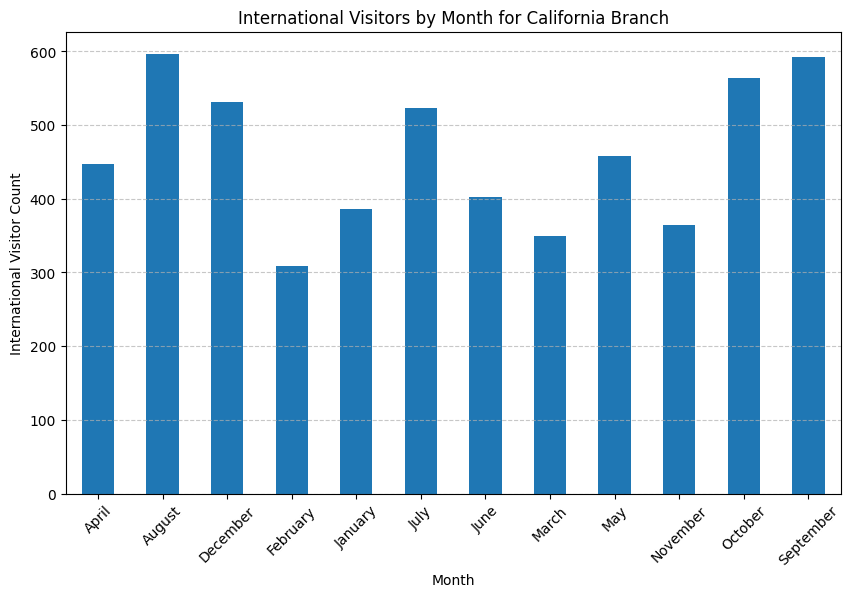

In [ ]:
#Visualising international visitors for california by month

plt.figure(figsize=(10, 6))
cal_int_month.plot(kind='bar')
plt.title('International Visitors by Month for California Branch')
plt.xlabel('Month')
plt.ylabel('International Visitor Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
#Sorting data for California local visitors by month
cal_local_month = california_branch_local['month'].value_counts().sort_index()
#print(cal_local_month)

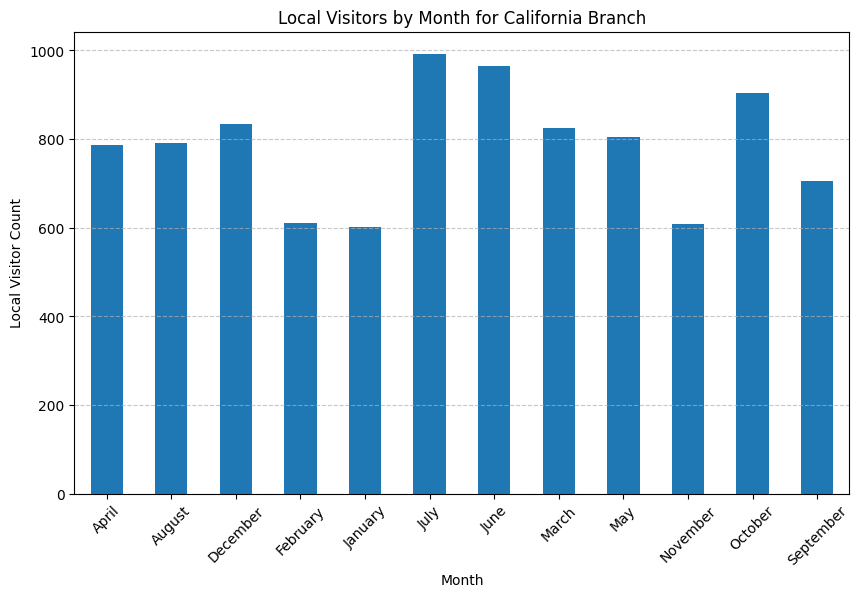

In [ ]:
#Visualising Local visitors for california by month

plt.figure(figsize=(10, 6))
cal_local_month.plot(kind='bar')
plt.title('Local Visitors by Month for California Branch')
plt.xlabel('Month')
plt.ylabel('Local Visitor Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**International visitors**

The peak visiting times at California branch for international visitors are August,September, October and July. The top international visitors are from Australia, Canada, UK and NZ.

During these months, all of these countries have colder weathers. It could be assumed that the visitors are aiming for a winter getaway, It is also important to note that California would have warmer tempreatures during this period.

**Local Visitors**

The top months for local visitors visiting california is July, June and October.
The assumption for a peak in june and july could be due to the fact that is is summer for california during that period. The peak for october could be because of promotions or special rides present during that month. (Note : October has overall high visitors for all parks)

# Part C


Text Processing for 'Review_Text' column

In [ ]:
#Initializing tokenizer to remove niose
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')

In [ ]:
#Function to clean and lower case
def clean_review(review):
    # Tokenize using the regular expression tokenizer
    tokens = tokenizer.tokenize(review)
    # Convert tokens to lowercase
    tokens = [token.lower() for token in tokens]
    # Join tokens back into a single string
    cleaned_review = ' '.join(tokens)
    return cleaned_review

In [ ]:
#apply clean_review function and check data
rev['Review_Text'] = rev['Review_Text'].apply(clean_review)
#rev.head(10)

In [ ]:
#Initialize an instance of SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [ ]:
# Function to analyze sentiment of one review
def analyze_sentiment(revtext):
    return sid.polarity_scores(revtext)

# Apply the sentiment analysis function to all reviews in Review_Text Column
rev['Sentiment Scores'] = rev['Review_Text'].apply(analyze_sentiment)

# Create columns for sentinents scores
rev['Compound'] = rev['Sentiment Scores'].apply(lambda score_dict: score_dict['compound'])
rev['Positive'] = rev['Sentiment Scores'].apply(lambda score_dict: score_dict['pos'])
rev['Neutral'] = rev['Sentiment Scores'].apply(lambda score_dict: score_dict['neu'])
rev['Negative'] = rev['Sentiment Scores'].apply(lambda score_dict: score_dict['neg'])


In [ ]:
# Print the DataFrame with the sentiment scores
#rev.head()

In [ ]:
#Function to get total sentiment scores for different Branches

def calculate_branch_sentiments(df,branch_name):
    #Filter for the branch
    branch_df = df[df['Branch'] == branch_name]
    # Calculate the average sentiment scores
    averages_scores = branch_df[['Compound', 'Positive', 'Neutral', 'Negative']].mean()
    #converiting scores to a dictonary
    average_scores_dict = averages_scores.to_dict()

    return average_scores_dict

In [ ]:
#getting sentiment score for California

calculate_branch_sentiments(rev,'California')

{'Compound': 0.698823590772317,
 'Positive': 0.1878206619859579,
 'Neutral': 0.775009227683049,
 'Negative': 0.03716776997659646}

In [ ]:
#getting sentiment score for Paris

calculate_branch_sentiments(rev,'Paris')

{'Compound': 0.6483465161165798,
 'Positive': 0.16482831499710482,
 'Neutral': 0.7877834394904459,
 'Negative': 0.04739287782281413}

In [ ]:
#getting sentiment score for HongKong
calculate_branch_sentiments(rev,'HongKong')

{'Compound': 0.718535218783351,
 'Positive': 0.18379188900747068,
 'Neutral': 0.7817175827107791,
 'Negative': 0.034491195304162225}

The Branch with the most positive sentiments is California with a positive sentiment score of 0.18675 compared with 18089 for HongKong and 0.16197 for Paris.

However, when considering compound scores HongKong branch has a rating of 0.71 whereas california has 0.69. Paris has the lowest postive and compound scores but also the highest negative scores.


#Part D

In [ ]:
# Function to calculate sentiment scores
def get_sentiment_scores(text):
    # Calculate overall sentiment score
    overall_score = sid.polarity_scores(text)

    # Replace commas with periods
    text = text.replace(',', '.')

    # Tokenize text into sentences
    sentences = sent_tokenize(text)

    # Calculate sentiment scores for each sentence
    sentence_scores = [sid.polarity_scores(sentence) for sentence in sentences]

    return sentences, sentence_scores

In [ ]:
# Function to calculate aspect sentiment
def aspect_sentiment(aspect, sents, scores):
    AspSen = []
    for s in range(len(sents)):
        Index = sents[s].find(aspect)
        if Index >= 0:
            AspSen.append(scores[s])
    if AspSen:
        Sentiment = [AspSen[x]['compound'] for x in range(len(AspSen))]
        return [round(mean(Sentiment), 3)]
    return [0]  # Return None if no aspect found

In [ ]:
# Apply the sentiment analysis function to each review
rev[['Sentences', 'Scores']] = rev['Review_Text'].apply(get_sentiment_scores).apply(pd.Series)

In [ ]:
rev['services_sentiment'] = rev.apply(lambda row: aspect_sentiment('service', row['Sentences'], row['Scores']), axis=1)

In [ ]:
rev['services_sentiment'] = rev['services_sentiment'].apply(lambda x: float(sum(x) / len(x)) if isinstance(x, list) else None)

In [ ]:
sum_services_sentiment = rev['services_sentiment'].sum()

In [ ]:
#print(rev.dtypes)

In [ ]:
#function to get sentiment score for services by branch

def calculate_service_sentiments(df,branch_name):
    #Filter for the branch
    branch_df = df[df['Branch'] == branch_name]
    # Calculate the average service sentiment scores
    averages_service_scores = branch_df['services_sentiment'].mean()
    # Print the average service sentiment score
    print(f'Average service sentiment score for branch {branch_name}: {averages_service_scores}')



In [ ]:
#getting sentiment score for California
calculate_service_sentiments(rev,'California')

#getting sentiment score for Paris
calculate_service_sentiments(rev,'Paris')

#getting sentiment score for HongKong
calculate_service_sentiments(rev,'HongKong')

Average service sentiment score for branch California: 0.035514075560013375
Average service sentiment score for branch Paris: 0.048533101717815094
Average service sentiment score for branch HongKong: 0.02243409818569904


Paris has recived the highest sentiment in reviews for services followed by HongKong and then California.

#Part E


In [ ]:
#rev.head(20)

In [ ]:
porter = PorterStemmer()
documents = rev['Review_Text']
Cleaned_doc = []

for r in range(len(documents)):
    review = documents.iloc[r]  # Use iloc to ensure proper indexing
    try:
        # removing everything except alphabets
        review = re.sub('[^A-Za-z]', ' ', review)
        # apply tokenization
        Tokens = review.split()
        # removing short words
        Filtered_token = [w for w in Tokens if len(w) > 3]
        review = ' '.join(Filtered_token)
    except Exception as e:
        print(f"Error processing review at index {r}: {e}")
        continue
    # Save cleaned text, will not print to save screen space
    Cleaned_doc.append(review)

In [ ]:
#Removing Stopwords
nltk.download('stopwords')

stop_words = stopwords.words('english')

# Remove Stop Words
for r in range(len(Cleaned_doc)):
    each_item = []
    for t in Cleaned_doc[r].split():
        if t not in stop_words:
             each_item.append(t)
    Cleaned_doc[r] = ' '.join(each_item)
    #will not print to save screen space

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Term Document Matrix
count_vectorizer = CountVectorizer()# Fit and transform the processed titles

count_data = count_vectorizer.fit_transform(Cleaned_doc)
count_data

<32813x32107 sparse matrix of type '<class 'numpy.int64'>'
	with 1506886 stored elements in Compressed Sparse Row format>

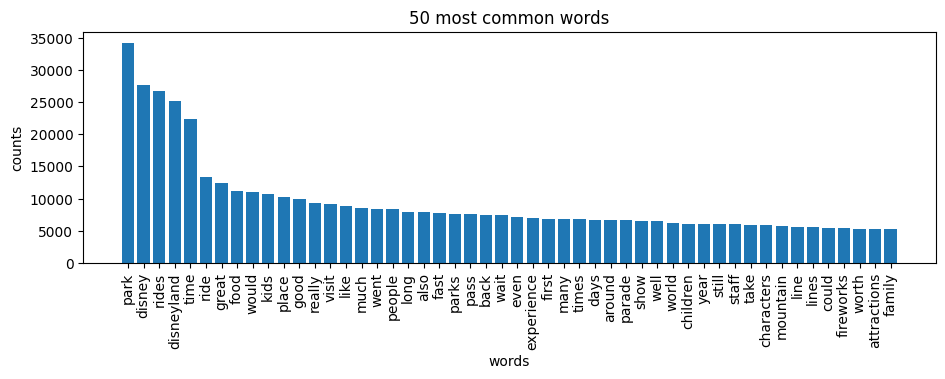

In [ ]:
#Visualising most common words

terms = count_vectorizer.get_feature_names_out()

# Count the popularity of words
total_counts = np.zeros(len(terms))
for t in count_data:
    total_counts+=t.toarray()[0]

count_dict = (zip(terms, total_counts))
count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:50] #Take the top 50 words

words = [w[0] for w in count_dict]
counts = [w[1] for w in count_dict]
x_pos = np.arange(len(words))

plt.figure(2, figsize=(11, 3))
plt.subplot(title='50 most common words')
plt.bar(words, counts)
plt.xticks(x_pos, words, rotation=90)
plt.xlabel('words')
plt.ylabel('counts')
plt.show()

Highly frequent = park, disney, rides, disneyland, time



In [ ]:
#Remove highly frequent (Greater than 20%) and infrequent words (less than 1%)
keepIndex = [];
for t in range(len(total_counts)):
    if total_counts[t] < 6562 and total_counts[t] > 328:
        keepIndex.append(t)

print('Number of Terms Remained: ', len(keepIndex))

#Save the remain ing term and frequency data
ReducedTerm = [terms[t] for t in keepIndex]
ReducedCount = count_data[:,keepIndex]
ReducedCount

Number of Terms Remained:  854


<32813x854 sparse matrix of type '<class 'numpy.int64'>'
	with 873686 stored elements in Compressed Sparse Row format>

LDA modelling

LDA model with 6 topics based on coherent scores

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

# Tweak the two parameters below
number_topics = 6

lda = LDA(n_components=number_topics, n_jobs=-1, random_state=2023)
lda.fit(ReducedCount)
#Trained LDA model
lda.components_

array([[ 695.4020359 ,  371.25260671,   40.36203115, ..., 2324.19960282,
         540.92902446,   70.22252494],
       [ 340.01413033,  190.81587107,   17.90643757, ...,  382.09908954,
         100.9574159 ,   96.54520308],
       [ 820.73126734,   47.79151602,  261.06757743, ...,  435.90931771,
          26.4550262 ,   25.94262616],
       [ 218.97558223,  127.7522493 ,  112.7667009 , ...,  292.85302719,
         871.36687316,  370.57457866],
       [  94.02171263,  576.46856955,  126.51747834, ...,  519.00942198,
         402.28822028,  106.72497121],
       [ 531.85527156,   32.91918735,  262.37977462, ...,   88.92954075,
         333.00344   ,   91.99009595]])

In [ ]:
#Word Probablities in Topics
Word_Topics_Pro = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]
print(Word_Topics_Pro)

[[0.00387485 0.00206866 0.0002249  ... 0.01295067 0.00301411 0.00039129]
 [0.00249435 0.00139983 0.00013136 ... 0.00280308 0.00074062 0.00070826]
 [0.00446862 0.00026021 0.00142143 ... 0.00237339 0.00014404 0.00014125]
 [0.00161441 0.00094186 0.00083138 ... 0.00215907 0.00642419 0.00273208]
 [0.00047564 0.00291628 0.00064004 ... 0.0026256  0.00203512 0.00053991]
 [0.00278582 0.00017243 0.00137433 ... 0.00046581 0.00174425 0.00048184]]


In [ ]:
#View words in each topic
for topic_idx, topic in enumerate(Word_Topics_Pro):
    print("\nTopic #%d:" % topic_idx)
    count_dict = (zip(ReducedTerm, topic))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:5]
    for w in count_dict:
        print(w[0], ': {0:.3f}'.format(w[1]))


Topic #0:
year : 0.016
love : 0.016
always : 0.016
family : 0.013
every : 0.013

Topic #1:
mountain : 0.033
world : 0.027
space : 0.019
california : 0.017
land : 0.014

Topic #2:
line : 0.019
minutes : 0.019
closed : 0.016
hour : 0.012
hours : 0.010

Topic #3:
hong : 0.019
kong : 0.019
children : 0.014
attractions : 0.014
small : 0.013

Topic #4:
paris : 0.017
staff : 0.016
hotel : 0.014
characters : 0.013
children : 0.011

Topic #5:
take : 0.018
early : 0.017
make : 0.012
want : 0.011
water : 0.011


In [ ]:
# View full Word Probabilities by Topic Matrix
df_topic_keywords = pd.DataFrame(Word_Topics_Pro)
df_topic_keywords.columns = ReducedTerm
#df_topic_keywords Remove hashtag to see

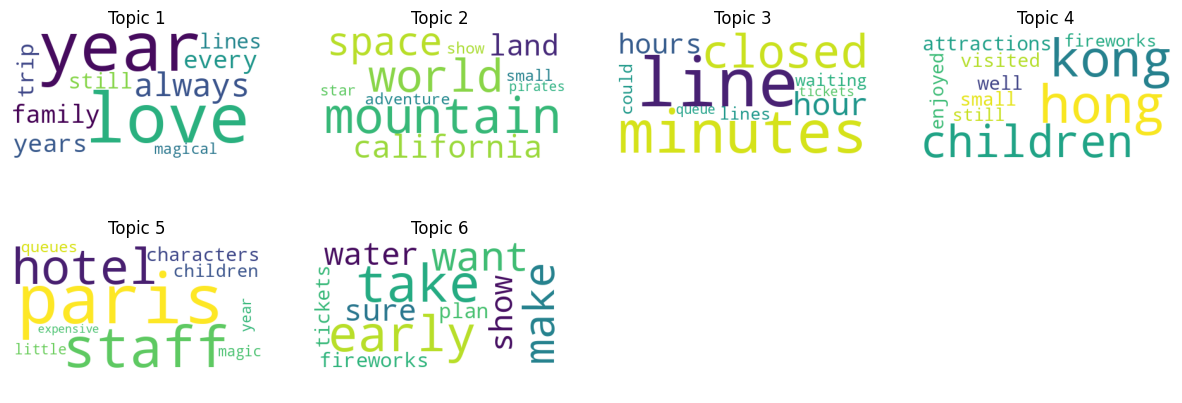

In [ ]:
!pip install wordcloud

from wordcloud import WordCloud
import math
rows = math.ceil(len(Word_Topics_Pro)/4)
fig, ax = pyplot.subplots(rows, 4, figsize=(15,2.5*rows))
[axi.set_axis_off() for axi in ax.ravel()]
for topic_idx, topic in enumerate(Word_Topics_Pro):
    count_dict = (zip(ReducedTerm, topic))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)
    # convert to dictionary type - keep top 10 words
    Word_Frequency = dict(count_dict[0:10])
    # generate word cloud
    wordcloud = WordCloud(background_color="white").generate_from_frequencies(Word_Frequency)
    # visualize word cloud in figure
    subfig_Row = math.floor(topic_idx/4)
    subfig_Col = math.ceil(topic_idx%4)
    ax[subfig_Row,subfig_Col].imshow(wordcloud)
    ax[subfig_Row,subfig_Col].set_title("Topic {}".format(topic_idx+1))
plt.show()

Based on the coherence scores, topic modeling has been done for 6 topics.

**Interessts and concerns when visiting theme parks**

These 6 topics would help in understanding the concerns and interests. Based on the word cloud, the following topics can be assumed,



1.  ** Interests** could be family trip, love, magical, every year, and **concerns** could be lines.
2.   Key word include **california** therefore these reviews could be about the california branch. Space and pirates could be themes in the park which customers are interested in. further, star, show adventure and world are keywords. small is also another keyword which could be a **concern**.
3. Talks about ines, waiting, hours, que, closed, tickets. Likley **concerns** about long ques and waiting times.
4. Keywords include **hongkong**. Therefore likley reviews about hong kong branch. Further keywords say fireworks, enjoyed, attractions, small and children.
5. Keywords include **Paris**. Likley reviews about paris branch. Keywords include staff which could indicate service quality (paris had the highest sentiments for service), further talks about characters which could indicate characters in the park are an interest area. Also keywords hotel, expensive, ques could be **concerns**.
6. Key words include Take,Early, Water, Sure, Plan, Tickets, Show, Fireworks. These could be **concerns** about taking adequet water and getting theur early and planning the trip.



In [ ]:
#Compute topic distribution for each document
TopicDis_Doc = lda.transform(ReducedCount)

#Compute overall topic distribution for all each documents
Overall_Topic_Dis = sum(TopicDis_Doc)/sum(sum(TopicDis_Doc))
Overall_Topic_Dis

array([0.2378768 , 0.12708233, 0.1390639 , 0.1852214 , 0.15318527,
       0.1575703 ])

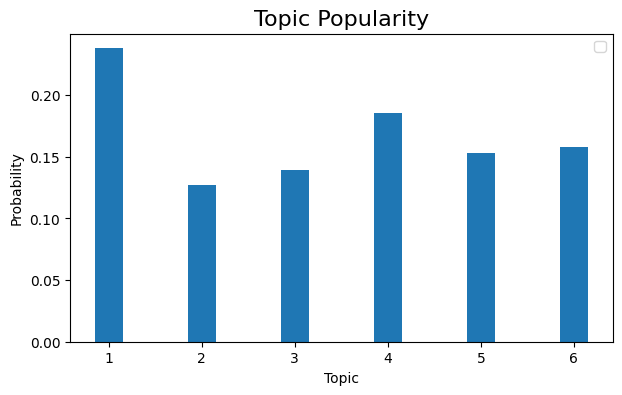

In [ ]:
#Visualize the topic distribution using bar chart
# Get the topic index
Bar_index = np.asarray(range(1,number_topics+1))

#Visualize topic distributions of review groups
pyplot.figure(figsize=(7,4))
pyplot.title('Topic Popularity', fontsize=16)
pyplot.xlabel('Topic')
pyplot.ylabel('Probability')
pyplot.bar(Bar_index, Overall_Topic_Dis.tolist(), 0.3)
pyplot.xticks(Bar_index, Bar_index)
pyplot.legend()
pyplot.show();

Topic distribution by document

In [ ]:
# View full Topic Probabilities by Document Matrix
TopicDis_Doc = lda.transform(ReducedCount)
df_document_topics = pd.DataFrame(TopicDis_Doc)
#df_document_topics remove hastag to run code to see

Topic Probablity distribution by Document: 
 [[0.96169214 0.00763273 0.00772673 0.00763126 0.00763088 0.00768626]
 [0.89505069 0.02098831 0.02103196 0.02093361 0.02096081 0.02103462]
 [0.19393536 0.0067481  0.00673379 0.00674842 0.00675122 0.77908312]
 [0.63988163 0.13451929 0.00262115 0.00262456 0.21771409 0.00263927]
 [0.35379292 0.00698427 0.61816346 0.00702704 0.00700304 0.00702925]]


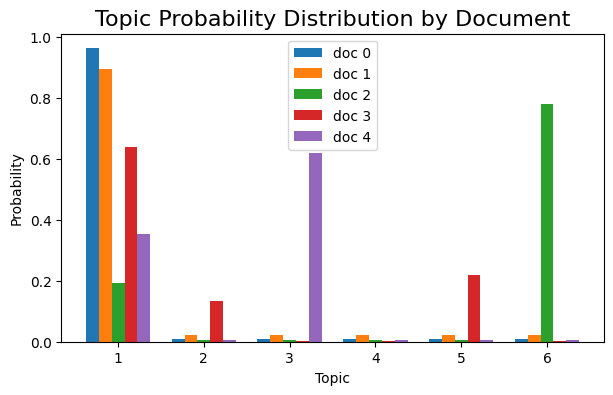

In [ ]:
# Compute the topic distribution for some reviews:
TopicDis_Doc = TopicDis_Doc[0:5]
print('Topic Probablity distribution by Document: \n', TopicDis_Doc)
# Get the topic index
Bar_index = np.asarray(range(1,number_topics+1))

#Create a new figure
pyplot.figure(figsize=(7,4))
pyplot.title('Topic Probability Distribution by Document', fontsize=16)
pyplot.xlabel('Topic')
pyplot.ylabel('Probability')

width = 0.15
for i in range(0,5):
    pyplot.bar(Bar_index + i*width, TopicDis_Doc[i].tolist(), width,  label='doc ' + str(i))

pyplot.xticks(Bar_index + 2*width, Bar_index)
pyplot.legend()
pyplot.show();

#Part F

Display topic probability distributions of reviews written by people from United States and United Kingdom






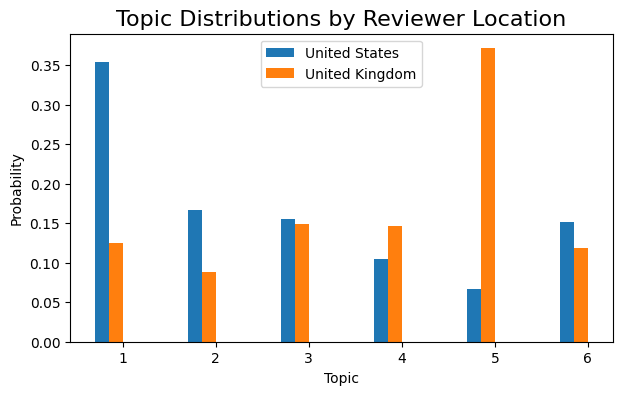

In [ ]:
Selected_Countries = ['United States','United Kingdom']

Group_Prob = []
for i in range(len(Selected_Countries)):
    ReducedTerm_Selected = ReducedCount[np.where(rev['Reviewer_Location']  == Selected_Countries[i])]
    TopicDis_Doc = lda.transform(ReducedTerm_Selected)
    Group_Prob.append(sum(TopicDis_Doc)/sum(sum(TopicDis_Doc)))


#Create a new figure
pyplot.figure(figsize=(7,4))
pyplot.title('Topic Distributions by Reviewer Location', fontsize=16)
pyplot.xlabel('Topic')
pyplot.ylabel('Probability')

width = 0.15
for i in range(len(Selected_Countries)):
    pyplot.bar(Bar_index + i*width, Group_Prob[i].tolist(), width,  label=Selected_Countries[i])

pyplot.xticks(Bar_index + 1.5*width, Bar_index)
pyplot.legend()
pyplot.show();

**Concerns and Interests of United States**
Visitors from the USA have shown the most interest in Topic 1. Topic one was related to interests in Love, Family, Year. Based on these we can assume that the Americans like to visit the theme parks as a Family trip to have a nice time with their family memebers. Further, the word magical is also an interest seen in this topic. Potential concerns in topic 1 are about lines. Also the word year and years are prominent therefore we could assume Americans like to visit the theme parks every year.

Topic 2 is the second highest for American visitors. It is about the california Branch and its interest areas such as the themes present. Since California branch had 60% visitors from the USA it is important that they include themes which are magical and facilitate themes for family oriented visitors. Furthe they should take action regarding their lines by implementing measures such as self checkin and online ticket booking.



**Concerns and Interests of United Kingdom**

The highest topic for visitors from UK is the Topic 5, which relates to the Paris Branch. In earlier analysis we found that the top visitor group for the paris branch is UK visitors. Therefore, Based on this topic we can assume that UK visitors have a concern about Ques, hotels and prices as Expensive is a key word here. However, the word staff was also mentioned, and since paris scored higher on services we can assume that UK visitors are interested in it. Further, Characters, chidlren and magic were key words in the topic and can be assumed that these are interests among the UK visitors.

Second highest topic for UK visitors were topic 2. The topic is about the Hong Kong branch and key interests were children, attractions, enjoyed, fireworks. We can assume that UK visitors who visit HongKong branch are interested in childrens enjoyements as well as the fireworks.

**Common concerns for UK and US visitors**

Both visitors from UK and US were interested in topic 3 in a similar level. The topic 3 is about waiting times, ques, and hours is a keyword. Which could suggest that since both groups visit different parks, this issue is present in all three parks. The second most common topic which is topic 6 also points to similar concerns with keywords early, plan. Further the topic 6 points to take, water which could suggest that both visitor groups faced water issues.

 The management should take action to reduce lines and waiting times. Especially among the childrens activities as children was a key word among both groups (UK and USA). Further, they should ensure that there is adequet access to water as it is seen as a common issue between the two groups.

Selecting the best number of Topics

In [ ]:
#This only needs to run once to install Gensim package
#Make sure that your computer is connected to the Internet
!pip install Cython
!pip install gensim

In [ ]:
#Data preparation
Cleaned_doc_new = []
for r in range(len(Cleaned_doc)):
    each_item = []
    for t in Cleaned_doc[r].split():
        #Keep only terms included in ReducedTerm
        if t in ReducedTerm:
             each_item.append(t)
    Cleaned_doc_new.append(each_item)

In [ ]:
import gensim.corpora as corpora

# Construct term dictionary in the format "Term : Index"
id2word = corpora.Dictionary(Cleaned_doc_new)
print(id2word.token2id)

{'awesome': 0, 'christmas': 1, 'crowds': 2, 'decorations': 3, 'entry': 4, 'ever': 5, 'experienced': 6, 'holiday': 7, 'lights': 8, 'loved': 9, 'parking': 10, 'past': 11, 'return': 12, 'seeing': 13, 'seen': 14, 'think': 15, 'worst': 16, 'always': 17, 'couple': 18, 'course': 19, 'family': 20, 'love': 21, 'point': 22, 'sure': 23, 'activities': 24, 'arrive': 25, 'characters': 26, 'enough': 27, 'fantastic': 28, 'fireworks': 29, 'full': 30, 'left': 31, 'line': 32, 'magic': 33, 'make': 34, 'meet': 35, 'miss': 36, 'night': 37, 'offer': 38, 'older': 39, 'opening': 40, 'passes': 41, 'reason': 42, 'spend': 43, 'waiting': 44, 'wonderful': 45, 'adventure': 46, 'ages': 47, 'along': 48, 'beauty': 49, 'behind': 50, 'birthday': 51, 'buffet': 52, 'california': 53, 'castle': 54, 'come': 55, 'december': 56, 'dinner': 57, 'dream': 58, 'everything': 59, 'feel': 60, 'filled': 61, 'finally': 62, 'girl': 63, 'gives': 64, 'goes': 65, 'goofy': 66, 'guests': 67, 'happy': 68, 'highly': 69, 'hopper': 70, 'imagine': 

In [ ]:
#Bag of Word Representation
Corpus = [id2word.doc2bow(text) for text in Cleaned_doc_new]
print(Corpus)

[[(0, 1), (1, 2), (2, 3), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1)], [(17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1)], [(0, 1), (9, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1)], [(1, 1), (21, 1), (26, 3), (29, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 2), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 2), (58, 1), (59, 2), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 2), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 2), (82, 2), (83, 1), (84, 1), (85, 1), (86, 2), (87, 1), (88, 1), (89, 1), (90, 2), (91, 1), (92, 2), (93, 1)], [(10, 1), (11, 1), (67, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (1

In [ ]:
#construct LDA model using Gensim
import gensim
from gensim.models.ldamodel import LdaModel
from pprint import pprint#

#Train model using bag of word reprentation
lda_model = gensim.models.ldamodel.LdaModel(corpus=Corpus,
                                       id2word=id2word,
                                       num_topics=10,
                                       random_state=100)

#Print the Keyword in the 10 topics
pprint(lda_model.print_topics(num_words=10))
doc_lda = lda_model[Corpus]

[(0,
  '0.027*"children" + 0.021*"lots" + 0.019*"well" + 0.019*"loved" + '
  '0.014*"show" + 0.013*"family" + 0.012*"recommend" + 0.012*"must" + '
  '0.012*"fantastic" + 0.012*"worth"'),
 (1,
  '0.041*"staff" + 0.014*"year" + 0.013*"could" + 0.013*"daughter" + '
  '0.013*"cast" + 0.012*"members" + 0.011*"service" + 0.010*"rude" + '
  '0.010*"children" + 0.009*"smoking"'),
 (2,
  '0.031*"christmas" + 0.022*"fireworks" + 0.022*"year" + 0.022*"show" + '
  '0.016*"magical" + 0.016*"night" + 0.015*"characters" + 0.014*"france" + '
  '0.014*"parades" + 0.013*"visited"'),
 (3,
  '0.020*"hotel" + 0.012*"line" + 0.012*"hour" + 0.012*"minutes" + '
  '0.010*"hours" + 0.010*"take" + 0.009*"front" + 0.008*"waiting" + '
  '0.008*"could" + 0.008*"show"'),
 (4,
  '0.038*"village" + 0.029*"best" + 0.018*"show" + 0.018*"characters" + '
  '0.018*"trip" + 0.013*"land" + 0.013*"still" + 0.012*"amazing" + '
  '0.012*"king" + 0.011*"worth"'),
 (5,
  '0.066*"paris" + 0.025*"florida" + 0.018*"world" + 0.013*"f

In [ ]:
#compute topic coherence score
from gensim.models import CoherenceModel

# Compute Coherence Score. Note: that CoherenceModel require
# text input format (Cleaned_doc_new) instead of bag of word
coherence_model_lda = CoherenceModel(model=lda_model,
                                     texts=Cleaned_doc_new,
                                     dictionary=id2word,
                                     coherence='c_v')


coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.48876115108104273


Experimenting with Topic numb

In [ ]:
#Evaluation models with topics numbers from 2 to 20
Topics = list(range(2,21,1))
coherence_scores = []
Trained_Models = []
for top in Topics:
    lda_model = gensim.models.ldamodel.LdaModel(corpus=Corpus,
                                               id2word=id2word,
                                               num_topics=top,
                                               random_state=100)
    #Keep the trained models
    Trained_Models.append(lda_model)
    #Compute coherence score for each model
    coherence_model_lda = CoherenceModel(model=lda_model,
                                         texts=Cleaned_doc_new,
                                         dictionary=id2word,
                                         coherence='c_v')
    coherence = coherence_model_lda.get_coherence()
    #Save and print the coherence scores
    coherence_scores.append(coherence)
    print('Topic Number: {0} -- Coherence: {1}'.format(top, coherence))

Topic Number: 2 -- Coherence: 0.4663794279583114
Topic Number: 3 -- Coherence: 0.4696264606624602
Topic Number: 4 -- Coherence: 0.46090030294592993
Topic Number: 5 -- Coherence: 0.49310252925204334
Topic Number: 6 -- Coherence: 0.5079573285435806
Topic Number: 7 -- Coherence: 0.4893962780806981
Topic Number: 8 -- Coherence: 0.49400972093937495
Topic Number: 9 -- Coherence: 0.4922309924937851
Topic Number: 10 -- Coherence: 0.48876115108104273
Topic Number: 11 -- Coherence: 0.48109896402382657
Topic Number: 12 -- Coherence: 0.48120699239384623
Topic Number: 13 -- Coherence: 0.5004720469107867
Topic Number: 14 -- Coherence: 0.46671004450505965
Topic Number: 15 -- Coherence: 0.4809126114115243
Topic Number: 16 -- Coherence: 0.47331134008730247
Topic Number: 17 -- Coherence: 0.49241553818230566
Topic Number: 18 -- Coherence: 0.4956013298142421
Topic Number: 19 -- Coherence: 0.4947479061932088
Topic Number: 20 -- Coherence: 0.4881518233042502


Text(0, 0.5, 'Coherence')

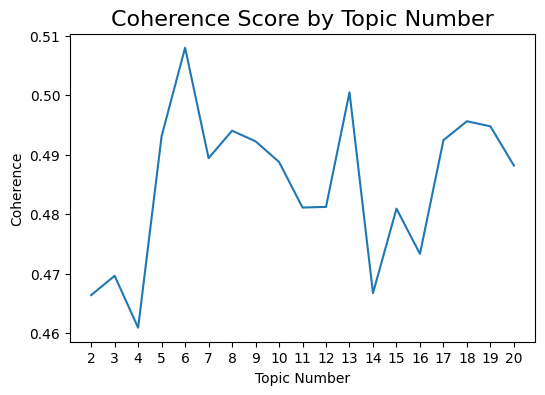

In [ ]:
pyplot.figure(figsize=(6,4))
pyplot.plot(coherence_scores)
pyplot.xticks(range(0,len(Topics)),Topics)
pyplot.title('Coherence Score by Topic Number', fontsize=16)
pyplot.xlabel('Topic Number')
pyplot.ylabel('Coherence')

The Coherence score by topic number shows highest coherence score for topics 6 and 13.

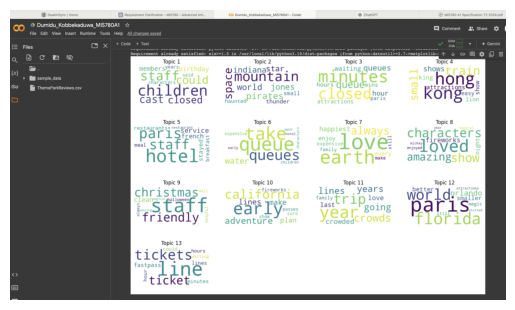

In [ ]:
import matplotlib.image as mpimg

# Loading world cloud image of second best topic number for reference
image_path = 'topics13.png'
img = mpimg.imread(image_path)

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

when selecting 13 topics most of the words are repeated in some topics (topic 6, topic 3, topic 13). Therefore the analysis will be conducted using 6 topics.

<a id = "cell_Practicalimplication"></a>
### 5. Practical Implication

The findings concluded that the top 10 visitors for each branch would be from close by countries or countries in the region. The california branch had a large number of visitors from USA. However, others included english speaking countries and neibouring countries. Therefore, it is recommended that each branch target their marketing efforts to visitors from these countries. Such campaigns could include including cultural aspects to accomodate such visitors during peak times. Further, the park could facilitate airfare and hotel offers by partnering with airlines to attract more customers from these countries.

The findings concluded that 60% of visitors for california are local visitors. The peak time for these visitos are the months july, june, october and december. Further, the interests of US visitors were seen as family friendliness, magical, space, adventure and pirate themes and attractions. Their concerns were long ques, waiting times and water needs. It is recommended that the California branch address these needs and make efforts to include above mentioned themes in their park during these months to attract more local customers and further drive revenue.

California branch will see a peak in local customers in August, September and october. It is recommended that the branch make efforts to create hotel deals and air fare deals during these months to attract more international visitors.

Most positive reviews were given for california branch and HongKong was a close second. However, paris had recieved the lowest positive reviews. The wordcloud revealed that concerns for paris were 'expensive' and 'hotel'. It is recommended that management take action to resolve these issues by offering hotel deals exclusive for themse park visitors.

The aspect level sentiment analysis showed that paris branch had the highest service levels. Therefore paris management should put efforts to maintain this and also provide best practices for other two branches.

Further analysis showed that both uk and us customers express concern about longer waiting times, therefore it is recommended that theme parks make efforts to have self checkouts and online ticket reservations for the attractions. further they should look into opening more attractions during the peak months mentioned above to reduce lines for single attractions.

